In [ ]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################
#
# Wrangle Synthetic Medical Record Data
#
##########################################################################################

## Fetch data

https://github.com/ishaghodgaonkar/emrbots/blob/master/100-Patients.zip

unzip it into the Data folder

In [ ]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt

In [ ]:
pwd

In [ ]:
##################################################################################################################
#
# YouDo: Import each of the 4 files into its own data frame
#         (Hint:  they're tab-separated)
# 'C:\\Users\\austi\\Documents\\csph\\bios6644\\BIOS6644_Github\\BIOS6644_Spring_2024\\students\\austin_albino\\data'
admiss_core = pd.read_csv("C:\\Users\\austi\\Documents\\csph\\bios6644\\BIOS6644_Github\\BIOS6644_Spring_2024\\students\\austin_albino\\data\\100-patients\\AdmissionsCorePopulatedTable.txt",sep="\t",index_col="PatientID")
admiss_diag_core = pd.read_csv("C:\\Users\\austi\\Documents\\csph\\bios6644\\BIOS6644_Github\\BIOS6644_Spring_2024\\students\\austin_albino\\data\\100-patients\\AdmissionsDiagnosesCorePopulatedTable.txt",sep="\t",index_col="PatientID")
patient_core = pd.read_csv("C:\\Users\\austi\\Documents\\csph\\bios6644\\BIOS6644_Github\\BIOS6644_Spring_2024\\students\\austin_albino\\data\\100-patients\\PatientCorePopulatedTable.txt",sep="\t",index_col="PatientID")
labs_core = pd.read_csv("C:\\Users\\austi\\Documents\\csph\\bios6644\\BIOS6644_Github\\BIOS6644_Spring_2024\\students\\austin_albino\\data\\100-patients\\LabsCorePopulatedTable.txt",sep="\t",index_col="PatientID")

In [ ]:
# 1) 
admiss_core, 
patient_core
labs_core


In [ ]:
# Dates!

In [ ]:
##################################################################################################################
#
# YouDo: Notice that there are many columns with dates, but pandas assumed they're strings
#
#        1) use the pd.to_datetime() method to transform all of the time columns to have type datetime
#            # stretch goal:  do it in a loop based on the string 'Date' appearing in the column name
#
# Show the type
def convert_cols_to_datetime(df):
    for col in df:
        if "date" in col.lower() and type(df[col]) is not np.dtype('datetime64[ns]'):
            df[col] = pd.to_datetime(df[col])
  

In [ ]:

# 1) 
convert_cols_to_datetime(admiss_core)
convert_cols_to_datetime(admiss_diag_core)
convert_cols_to_datetime(patient_core)
convert_cols_to_datetime(labs_core)

In [ ]:
dflist=[admiss_core,admiss_diag_core,patient_core,labs_core]
for d in dflist:
    convert_cols_to_datetime(d)

In [ ]:
admiss_core.iloc[3]['AdmissionEndDate']-admiss_core.iloc[3]['AdmissionStartDate']

In [ ]:
# As is typical in complex data sets, informtion about each patient is broken up into several different
# tables, cross-referenced by a patient id
##################################################################################################################
#
# YouDo: Print out the records from each of the four tables for patient number
# 7A025E77-7832-4F53-B9A7-09A3F98AC17E	
ptnum='7A025E77-7832-4F53-B9A7-09A3F98AC17E'
admiss_core.loc[admiss_core.index==ptnum]
#admiss_core

for df in dflist:
    dfpt = df.loc[df.index == ptnum]
    print(dfpt)

In [ ]:
# SQL-like joins
jdf =  patient_core.join(labs_core, how='left')


In [ ]:
jdf.shape, patient_core.shape, labs_core.shape

In [ ]:
# Holy cow!  this patient has lots of lab results in her record
# This is synthetic data, so it's bound to have weird things.  Is that normal in this data?
##################################################################################################################
#
# You do:
#   1) Compute the average & standard deviation of number of labs per patient.
#         hint:  Consider pd.groupby()
#
print("Stats on Number of Labs per Patient")
ptlev = jdf.groupby(jdf.index).size()
print(f'The average number of Labs per Patient was {ptlev.mean()}, with a Standard Deviation of {ptlev.std()}.')
#print(...)

#   2) Compute a list of each lab and how many orders for that lab are in the data frame
#    
print('\n')
print("Number of each lab")
print(jdf.groupby(jdf.LabName).size())

In [ ]:
# It seems that this data set has the same patient getting the same labs perhaps dozens of times.
# Lets make a visualization of one of the time vs. one of the lab values for a specific patient.
##################################################################################################################
#
# You do:
#   1) Find the patient/lab combination with the most labs taken
# pt_most_labs=ptlev[ptlev==max(ptlev)]

print(f"Patient with the most labs: {pt_most_labs.index[0]}")

#   2) For the most-measured patient/lab combination, make a time vs lab-value plot
#    Hint:  you can "group by" multiple columns

In [ ]:
ptlablev = jdf.groupby(['PatientID','LabName']).size()
ptlablev.sort_values(ascending=False).index[0]


In [ ]:
# 1) 
# jdf.groupby(['PatientID','LabName']).size().sort_values()


In [ ]:
thebusypatient = '80D356B4-F974-441F-A5F2-F95986D119A2'
thebusylab = 'CBC: HEMATOCRIT'
subdf = jdf.loc[(jdf.index==thebusypatient) & (jdf.LabName.str.startswith(thebusylab))]

In [140]:
print(subdf.shape)
subdf.head(2)
subdf.to_csv('c:\\temp\\medrecs.csv')

(88, 11)


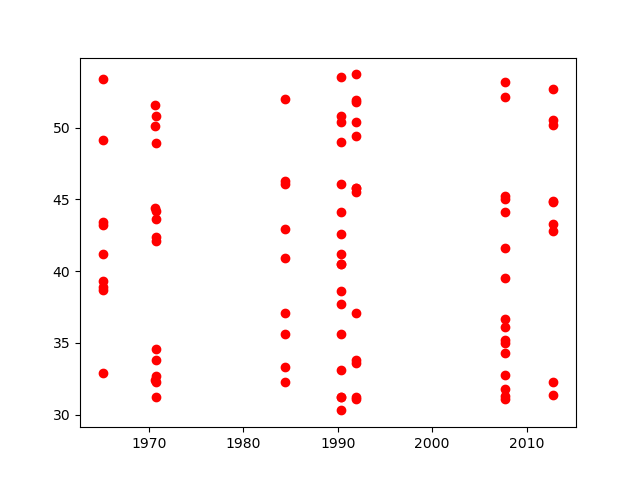

In [141]:
# 2) 
%matplotlib widget
dts = subdf.LabDateTime
vls = subdf.LabValue

plt.figure()
plt.plot(dts, vls, 'ro')

##################################################################################################################
#
# You do:
#   Closely inspect the plot you made.  
#
# 1) In order to compare this to another data set, your PI wants to know what the lab value was on August 6, 1985.  
#    What would you tell him/her (including all caveats)?
I would have to tell the PI that the patient had no CBC Hermatocrit tests at all in 1986. They had a value of 35.6 on 1984-06-10 and a value of 42.6 six years later in 1990, but that it strained reason to interpolate between such distant datapoints.

# 2) How about the value for December 14, 1991?
Here we can come a little closer to shedding light. Although the patient had no tests on that exact date, they did have a value of 50.4 the evening before, and 45.8 the next morning. Although I have no hematological expertise, those measurements might be near enough for triangulation.

In [ ]:
subdf[(subdf['LabDateTime']>'1985-01-01') & (subdf['LabDateTime']<'1991-01-01')]
# subdf
# mask = (df['date'] > start_date) & (df['date'] <= end_date)      